# Методы обучения без учителя.
## Методы кластеризации

В этом задании вам необходимо будет применить 3 метода кластеризации к данным.

Для каждого метода будет свой вопрос, ответ на который надо будет передать на портал

In [23]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

## Подготовка данных

Для начала загрузим данные из этой [статьи](https://fivethirtyeight.com/features/weather-forecast-news-app-habits/)

In [100]:
df = pd.read_csv('./weather-check.csv')

In [101]:
df.head()

RespondentID Do you typically check a daily weather report?  \
0    3887201482                                            Yes   
1    3887159451                                            Yes   
2    3887152228                                            Yes   
3    3887145426                                            Yes   
4    3887021873                                            Yes   

             How do you typically check the weather?  \
0              The default weather app on your phone   
1              The default weather app on your phone   
2              The default weather app on your phone   
3              The default weather app on your phone   
4  A specific website or app (please provide the ...   

  A specific website or app (please provide the answer)  \
0                                                  -      
1                                                  -      
2                                                  -      
3                                                  -      
4                                         Iphone app      

  If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?  \
0                                        Very likely                                                                                             
1                                        Very likely                                                                                             
2                                        Very likely                                                                                             
3                                    Somewhat likely                                                                                             
4                                        Very likely                                                                                             

       Age What is your gender?  \
0  30 - 44                 Male   
1  18 - 29                 Male   
2  30 - 44                 Male   
3  30 - 44                 Male   
4  30 - 44                 Male   

  How much total combined money did all members of your HOUSEHOLD earn last year?  \
0                                 $50,000 to $74,999                                
1                               Prefer not to answer                                
2                               $100,000 to $124,999                                
3                               Prefer not to answer                                
4                               $150,000 to $174,999                                

         US Region  
0   South Atlantic  
1                -  
2  Middle Atlantic  
3                -  
4  Middle Atlantic

Они представляют из сбея результат небольшого опроса жителей США на тему того, как они проверяют прогноз прогоды. Кроме того в опроснике есть пункты, связанные с соц-дем информацией: возраст, пол, заработок, регион. 

Все признаки, в данном случае, являются категориальными.

Для начала удалим столбец с идентификатором респондентов и столбец с открытым вопросом.

In [102]:
df = df.drop(labels=df.columns[0], axis=1)
df = df.drop(labels=df.columns[2], axis=1)
# df = df.drop(labels=df.columns[3], axis=1)

In [103]:
df.head()

Do you typically check a daily weather report?  \
0                                            Yes   
1                                            Yes   
2                                            Yes   
3                                            Yes   
4                                            Yes   

             How do you typically check the weather?  \
0              The default weather app on your phone   
1              The default weather app on your phone   
2              The default weather app on your phone   
3              The default weather app on your phone   
4  A specific website or app (please provide the ...   

  If you had a smartwatch (like the soon to be released Apple Watch), how likely or unlikely would you be to check the weather on that device?  \
0                                        Very likely                                                                                             
1                                        Very likely                                                                                             
2                                        Very likely                                                                                             
3                                    Somewhat likely                                                                                             
4                                        Very likely                                                                                             

       Age What is your gender?  \
0  30 - 44                 Male   
1  18 - 29                 Male   
2  30 - 44                 Male   
3  30 - 44                 Male   
4  30 - 44                 Male   

  How much total combined money did all members of your HOUSEHOLD earn last year?  \
0                                 $50,000 to $74,999                                
1                               Prefer not to answer                                
2                               $100,000 to $124,999                                
3                               Prefer not to answer                                
4                               $150,000 to $174,999                                

         US Region  
0   South Atlantic  
1                -  
2  Middle Atlantic  
3                -  
4  Middle Atlantic

Далее выполним перекодировку признаков с помощью метода `pd.get_dummies`. 

Конечно, для таких признаков как "заработок" или "регион проживания" можно выполнить более интеллектуальное преобразование (например учитывающее, что ответ "50,000 to  74,999" ближе к "80,000 to 99,999", чем к "150,000 to 174,999"), но для первого подхода мы этого делать не будем.

In [104]:
df_dummy = pd.get_dummies(df)

In [105]:
X = df_dummy.values

## Kmeans

Обычно, результаты kmeans на данных, полностью состоящим из категориальных признаков, получаются не такими хорошими.

* Обучите метод к-средних с `n_clusters` от 2 до 20 и `random_state=123`
* Создайте массив `scores`
* Для каждого запуска вычислите `silhouette_score` полученной кластеризации
* В переменную `answer1` сохраните значение наибольшего значения из `scores` c точностью до сотых

In [106]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn import metrics

### *РЕШЕНИЕ*

In [107]:
scores = []
for n_cluster in range(2,20):
    kmeans = KMeans(n_clusters=n_cluster, init='k-means++', n_init=10, random_state=123)
    kmeans.fit(X)
    labels = kmeans.labels_
    scores.append(metrics.silhouette_score(X, labels, metric='euclidean', random_state=123))

scores

[0.10028641287823049,
 0.099497151893524774,
 0.075671780782767747,
 0.075452760672761576,
 0.078606046539039104,
 0.082670741791150942,
 0.07320072716749626,
 0.07817943437260523,
 0.082499920629978157,
 0.0904605559597709,
 0.08933613117638757,
 0.085021917049335857,
 0.092291717602375214,
 0.083957463078321276,
 0.087636030505713239,
 0.092662124260249806,
 0.087028515927028802,
 0.096055712535936116]

## Агломеративная кластеризация

Попробуем применить агломеративную кластеризацию

* Прогоните метод с параметрами `method='average'`, `metric='cosine'`
* Визуализируйте полученную дендрограмму
* Выделите 5 кластеров из полученной иерархии
* В переменную `answer2` запишите долю мужчин во втором по величине кластере с точностью до сотых

In [108]:
from scipy.cluster.hierarchy import fcluster, dendrogram, linkage

### *РЕШЕНИЕ*

In [109]:
Z = linkage(X, method='average', metric='cosine')

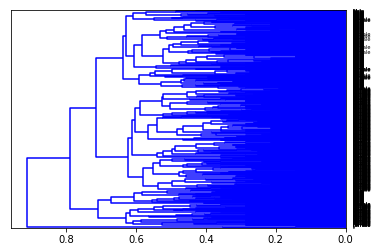

In [110]:
dend = dendrogram(Z, orientation='left', color_threshold=0.0, labels=df['What is your gender?'].values)
# dend = dendrogram(Z)

In [111]:
label = fcluster(Z, 0.7, criterion='distance')

In [112]:
np.unique(label)

array([1, 2, 3, 4, 5], dtype=int32)

In [115]:
labels, counts = np.unique(label[label>=0], return_counts=True)

In [118]:
print(label[np.argsort(-counts)[:3]])

[5 5 5]


In [113]:
df.loc[:, 'label_d'] = label

In [121]:
for i, group in df.groupby('label_d'):
    print('=' * 10)
    print('cluster {}'.format(i))
    print(group)

cluster 1
    Do you typically check a daily weather report?  \
7                                              Yes   
12                                              No   
24                                              No   
74                                             Yes   
406                                            Yes   
407                                            Yes   
542                                            Yes   
569                                             No   
576                                            Yes   
879                                             No   
926                                             No   
927                                            Yes   

    How do you typically check the weather?  \
7                                         -   
12                                        -   
24                                        -   
74                                        -   
406                                       -   
407  

## DBSCAN

Возможно вы уже успели заметить, что часть респондентов практически не отвечали на заданные вопросы - то есть в соответствующих графах стоит символ "-". "Молчунами" будем называть участников опроса, которые не ответили ни на один вопрос. Таких респондентов можно сразу исключить из дальнейших исследований.

* Переберите значение параметра `eps` в интервале [0.1, 1] с шагом 0.1
* Остальные параметрамы установите следующим образом `min_samples=20`, `metric='cosine'`
* В переменную `answer3` запишите значение `eps` (c точностью до **сотых**) при котором алгоритм выделит всех "молчунов" в отдельный кластер с выбросами

In [ ]:
from sklearn.cluster import DBSCAN

### *РЕШЕНИЕ*

# Строка с ответами

In [ ]:
print('kmeans {:.2f}\nagg {:.2f}\ndbscan {:.2f}'.format(answer1, answer2, answer3))